This notebook performs a two-dimensional [PCA projection](https://en.wikipedia.org/wiki/Principal_component_analysis) of the word vectors of countries and their capital cities. 

The plot shows that countries and capitals have similar relationships to each other.

During the training we did not provide any supervised information about what a capital city means.

This demonstrates the ability of the model to automatically organize concepts and learn implicitly the relationships between them.

In [2]:
%matplotlib inline
import gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from numpy import dot
from gensim import matutils
from gensim.corpora import Dictionary
from keras.models import Model, load_model

## Load word2vec model

In [3]:
vocab_path = './word2vec/model/vocab.pkl'
model_path = './word2vec/model/w2v_enwiki_vocab=10000_model.h5'

# load vocabulary
vocab = Dictionary.load(vocab_path)

# load the Keras model
model = load_model(model_path)

# extract the word vector matrix W from the embedding layer
embedding_layer = model.layers[1]
W = embedding_layer.get_weights()[0]

print('Word vector matrix shape:', W.shape)

Word vector matrix shape: (10000, 100)


In [4]:
def plot_word_vectors(vectors, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    '''Plot word vectors. The vector dimensions are reduced using PCA.'''
    assert len(words)%2 == 0
    pca = PCA(n_components=2, whiten=True)
    vectors2d = pca.fit(vectors).transform(vectors)
    plt.figure(figsize=(6,6))
    plt.axis([x1, x2, y1, y2])

    first = True 
    for point, word in zip(vectors2d , words):
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    if arrows:
        for i in range(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    if title:
        plt.title(title)
                        
    plt.tight_layout()
    plt.show()
    
def token_vec(token, vocab, W):
    token_id = vocab.token2id[token]
    return W[token_id]
    

## Plot country/capital relationships

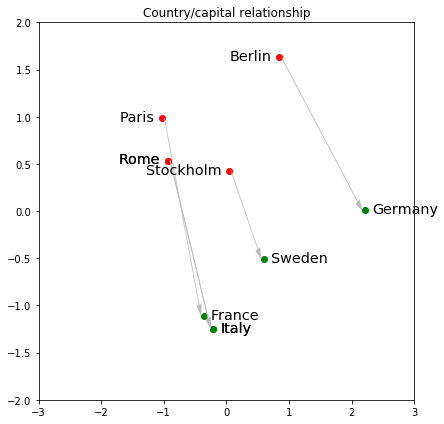

In [5]:
words = ['Berlin', 'Germany', 
         'Paris', 'France', 
         'Rome', 'Italy', 
         'Stockholm', 'Sweden', 
         'Rome', 'Italy']

vectors = [token_vec(word.lower(), vocab, W) for word in words]
plot_word_vectors(vectors, x1=-3, x2=3, y1=-2, y2=2, title='Country/capital relationship')